<a href="https://colab.research.google.com/github/huongd17at089/rice_diseases_detection/blob/toan/rice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

Sat Jul 31 12:18:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0    30W /  70W |   8926MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import PIL
import PIL.Image
import matplotlib.pyplot as plt
#khai báo frame work tensorflow
import tensorflow as tf
#import keras từ frame work tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_LEN = 224
IMAGE_SIZE = (IMAGE_LEN, IMAGE_LEN)
BATCH_SIZE = 16

In [ ]:
#tiền sử lý ảnh
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    #link dẫn ảnh
    "/content/drive/MyDrive/RICE/train",
    #chia chia train và val
    validation_split=0.1,
    subset="training",
    label_mode = "categorical",
    seed=1,
    
    #size của ảnh
    image_size=IMAGE_SIZE,
    #batch_size : chỉa ảnh vào từng batch để trainning như trong bài là 32
    batch_size=BATCH_SIZE)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/RICE/train",
    validation_split=0.1,
    subset="validation",
    label_mode = "categorical",
    seed=1,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

#store class names
class_names = train_ds.class_names

Found 2684 files belonging to 4 classes.
Using 2416 files for training.
Found 2684 files belonging to 4 classes.
Using 268 files for validation.


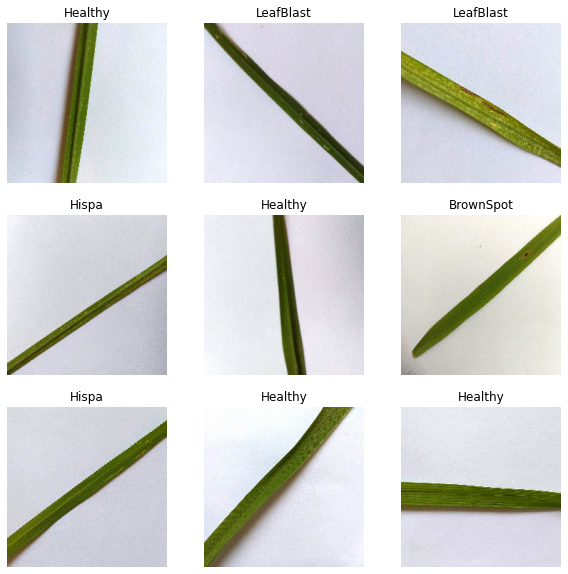

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # chuyển dạng one-hot sang nhãn
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, MaxPooling2D, MaxPool2D,AvgPool2D
from tensorflow.keras.layers import UpSampling2D, Conv2DTranspose, Bidirectional, Flatten,Dropout, Activation

In [ ]:
def VGG16():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), input_shape=(224,224,3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(Conv2D(250, (3, 3)))
  model.add(Activation('relu'))
  model.add(Conv2D(128,(3,3)))
  model.add(Activation("relu"))
  model.add(AvgPool2D(2,2))
  model.add(Conv2D(64,(3,3)))
  model.add(Activation("relu"))
  model.add(AvgPool2D(2,2))
  model.add(Conv2D(256, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(128))
  model.add(Dense(4))
  model.add(Activation('softmax'))
  return model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
activation_54 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_55 (Activation)   (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 52, 52, 64)      

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/RICE/train/checkpoint_lstm.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,monitor='val_accuracy',save_best_only=True)

history =model.fit_generator(train_ds,validation_data=val_ds,epochs=30,shuffle=True,callbacks = [model_checkpoint_callback])

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


151/151 [==============================] - 589s 4s/step - loss: 0.6195 - accuracy: 0.4255 - val_loss: 0.5229 - val_accuracy: 0.4739
Epoch 2/30
151/151 [==============================] - 901s 6s/step - loss: 0.5065 - accuracy: 0.4760 - val_loss: 0.4979 - val_accuracy: 0.5000
Epoch 3/30
151/151 [==============================] - 1152s 7s/step - loss: 0.4858 - accuracy: 0.5025 - val_loss: 0.4743 - val_accuracy: 0.4963
Epoch 4/30
151/151 [==============================] - 563s 3s/step - loss: 0.4664 - accuracy: 0.5153 - val_loss: 0.5972 - val_accuracy: 0.4254
Epoch 5/30
151/151 [==============================] - 540s 3s/step - loss: 0.4795 - accuracy: 0.4954 - val_loss: 0.4981 - val_accuracy: 0.5261
Epoch 6/30
151/151 [==============================] - 836s 5s/step - loss: 0.4709 - accuracy: 0.5079 - val_loss: 0.4734 - val_accuracy: 0.4701
Epoch 7/30
151/151 [==============================] - 1171s 8s/step - loss: 0.4576 - accuracy: 0.5331 - val_loss: 0.4604 - val_accuracy: 0.5522
Epoch 8/

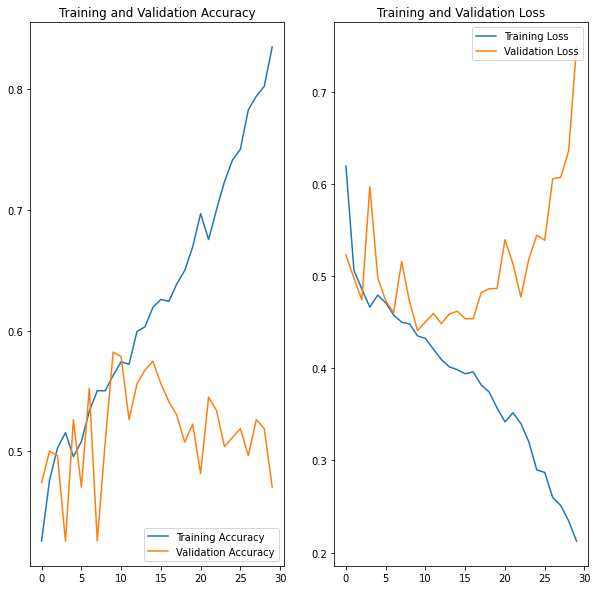

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
testSet = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/RICE/val",
    shuffle=True,
    label_mode = "categorical",
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 464 files belonging to 4 classes.


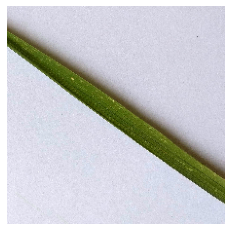

True label: Healthy
Predicted label: LeafBlast


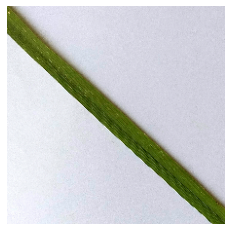

True label: Hispa
Predicted label: Hispa


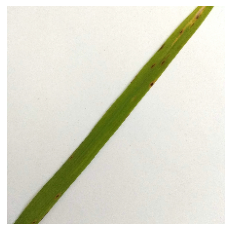

True label: BrownSpot
Predicted label: BrownSpot


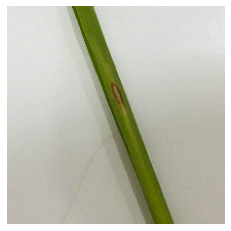

True label: LeafBlast
Predicted label: BrownSpot


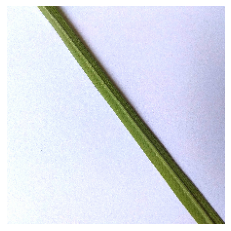

True label: Healthy
Predicted label: LeafBlast


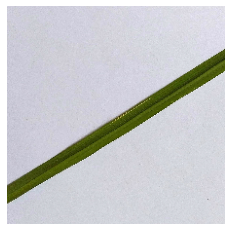

True label: Hispa
Predicted label: Hispa


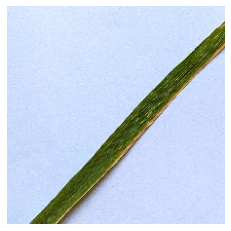

True label: LeafBlast
Predicted label: LeafBlast


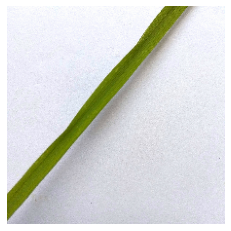

True label: Healthy
Predicted label: Healthy


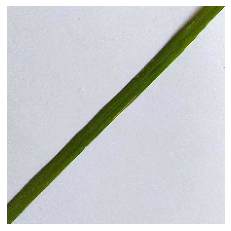

True label: Hispa
Predicted label: Healthy


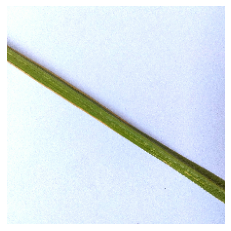

True label: LeafBlast
Predicted label: LeafBlast


In [ ]:
def get_class_string_from_index(index):
    return testSet.class_names[index]
        
for images, labels in testSet.take(1):
    for i in range(10):
        plt.imshow(images[i].numpy().astype("uint8"))
        true_index = np.argmax(labels[i])
        plt.axis("off")
        plt.show()
        
        #sử dụng model vừa train để dự đoán ảnh
        prediction_scores = model.predict(np.expand_dims(images[i], axis=0))
        predicted_index = np.argmax(prediction_scores)
        print("True label: " + get_class_string_from_index(true_index))
        print("Predicted label: " + get_class_string_from_index(predicted_index))